<a href= 'https://stackoverflow.com/questions/43027980/purpose-of-matplotlib-inline' > Magic Function in Python</a> %matplotlib inline

This Notebook solves linear regression problem using both notation:-
1. h(x) = theta.T * X  (This part is commented)
2. h(x) = X * theta

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('data/ex1data1.txt', names = ['X', 'Y'])
X = np.array(df['X'])
Y = np.array(df['Y'])

In [4]:
def warmUpExercise():
    A = np.eye(5,5)
    return A

In [5]:
A = warmUpExercise()

In [6]:
A

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [7]:
def plot_data(X, Y):
    plt.figure(0,figsize = (15,5))   #figure open a new figure window, figsize tells the size of figure
    plt.plot(X, Y, 'rx', markersize=5)  #markersize decides the size of points plotted
    plt.xlabel('Population of City in 10,000s')   #X-axis Label
    plt.ylabel('Profit in $10000s')  #Y-axis label
    plt.show()  #displays the figure only and not text/type of figure

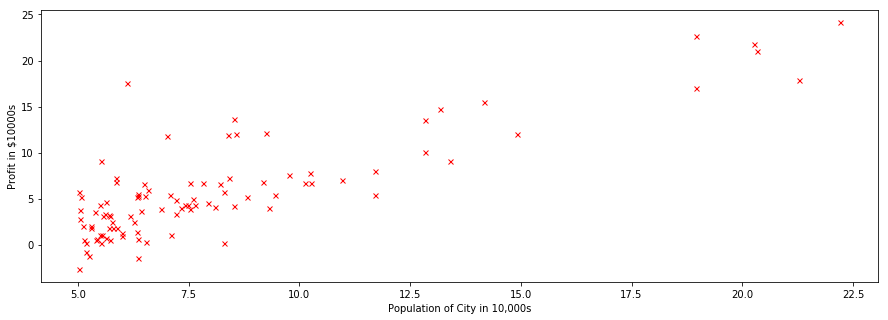

In [8]:
plot_data(X, Y)

In [9]:
def initialise_theta(shape):
    theta = np.zeros(shape)
    return theta

In [10]:
theta = initialise_theta((2,1))  #inititialising theta with zeros since only single variable thus, shape = (2,1), theta0 theta1

In [11]:
theta  #theta0 is taken as bias, theta1 for feature X

array([[0.],
       [0.]])

In [12]:
theta.shape  # column matrix shape = n+1*1

(2, 1)

In [13]:
num_of_iterations = 1500 #gradient descent setting for convergence of parameters
alpha = 0.01 #learning rate

In [14]:
def computeCost(X, Y, theta):
#     m = Y.shape[1]  # Number of training examples when Y = (1,97)
    m = Y.shape[0]
#     cost = np.sum(np.square(np.subtract(np.dot(theta.T, X),Y)))/(2*m)
    cost = np.sum(np.square(np.subtract(np.dot(X, theta),Y)))/(2*m)
    return cost

Before Computing Cost X and needs to be re-aligned as per requirements of Hypothesis

In [15]:
X.shape   #Rank 1 matrix changing it first to rank 2 matrix

(97,)

In [16]:
X = X.reshape((X.shape[0],1))  #column matrix with 97 rows and 1 column 

We need to change X to a row matrix with <b>m</b> number of columns and <b>n</b> number of rows<br>
Where <br>
m = number of training examples <br>
n = number of features

In [ ]:
X = X.T

Transposing X is required to calculate <i>h(x) = theta.T*X</i> <br>
It won't be required if we are computing <i> h(x) = X*theta

In [17]:
X.shape  # 1 = number of features, 97 = number of training examples

(97, 1)

We need to add one more row for X0 in X 

In [ ]:
np.ones((X.shape[0],X.shape[1]))

In [ ]:
X

In [ ]:
X = np.concatenate((np.ones((X.shape[0], X.shape[1])), X), axis = 0)

In [ ]:
np.vstack?

In [ ]:
np.hstack?

In [18]:
X = np.hstack((np.ones((X.shape[0],X.shape[1])), X))

In [19]:
X.shape

(97, 2)

In [ ]:
X

In [ ]:
np.concatenate?

In [20]:
Y.shape

(97,)

Dot product of theta.T and X will result in (1,97) matrix i.e. what is computed by hypothesis

In [ ]:
np.dot(theta.T, X).shape

This dot product needs to be subtracted from Y

In [21]:
Y = Y.reshape((Y.shape[0], 1))

In [22]:
Y.shape

(97, 1)

In [23]:
X.shape

(97, 2)

In [24]:
theta.shape

(2, 1)

In [25]:
J = computeCost(X, Y, theta)
print("With theta = [0 ; 0]\nCost computed {}".format(J))

With theta = [0 ; 0]
Cost computed 32.072733877455676


In [26]:
theta1 = np.array([[-1],
                  [2]])

In [27]:
theta1.shape

(2, 1)

In [28]:
J = computeCost(X, Y, theta1)
print("With theta = [-1 ; 2]\nCost computed {}".format(J))

With theta = [-1 ; 2]
Cost computed 54.24245508201238


In [ ]:
m = Y.shape[1]
for i in range(0, 150):
    d0 = np.sum(np.subtract(np.dot(theta.T, X), Y))/(m)
    d1 = np.sum(np.multiply((np.subtract(np.dot(theta.T, X), Y)), X))
    temp0 = theta[0] - alpha*d0
    temp1 = theta[1] - alpha*d1
    theta[0] = temp0
    theta[1] = temp1

In [ ]:
theta

In [ ]:
(np.dot(theta.T, X)-Y).shape

In [29]:
def gradientDescent(X, Y, theta, alpha, num_of_iterations):
#     m = Y.shape[1]
    m = Y.shape[0]
    cost_array = np.zeros((num_of_iterations, 1))
    for i in range(0, num_of_iterations):
        J = computeCost(X, Y, theta)
        cost_array[i] = J
#         d0 = np.sum(np.subtract(np.dot(theta.T, X), Y))/(m)
#         d1 = np.sum(np.multiply((np.subtract(np.dot(theta.T, X), Y)), X))
#         temp0 = theta[0] - alpha*d0
#         temp1 = theta[1] - alpha*d1
#         theta[0] = temp0
#         theta[1] = temp1
#         theta = theta - (alpha/m)*(np.dot(X,(np.dot(theta.T,X)-Y).T))
        theta = theta - (alpha/m)*(np.dot(X.T,(np.dot(X, theta)-Y)))
    return (theta,cost_array)
        
    

In [30]:
theta, cost_array = gradientDescent(X, Y, theta, alpha, num_of_iterations)

In [31]:
theta

array([[-3.63029144],
       [ 1.16636235]])

In [32]:
theta.shape

(2, 1)

In [33]:
cost_array

array([[32.07273388],
       [ 6.73719046],
       [ 5.93159357],
       ...,
       [ 4.4834581 ],
       [ 4.48343473],
       [ 4.48341145]])

In [34]:
cost_array.shape

(1500, 1)

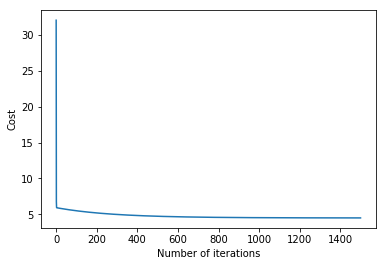

In [35]:
plt.figure()
plt.xlabel('Number of iterations')
plt.ylabel('Cost')
plt.plot(cost_array)
plt.show()

Plotting figure when h(x) = theta.T * X

In [ ]:
plt.figure()
plt.scatter(X[1,:], Y)
plt.plot(X[1,:], np.dot(theta.T, X).T)
plt.show()

Plotting figure when h(x) = X*theta

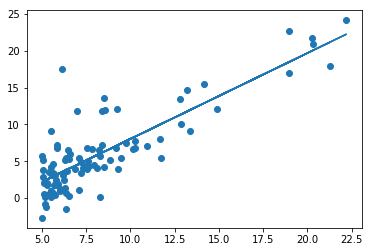

In [36]:
plt.figure()
plt.scatter(X[:, 1], Y)
plt.plot(X[:, 1], np.dot(X, theta))
plt.show()

In [ ]:
plt.plot(np.dot(theta.T, X).T)
plt.show()

In [ ]:
np.array([X[1,:]]).shape

In [ ]:
pred1 = np.dot(theta.T, [1, 3.5])

In [ ]:
pred1*10000

In [37]:
theta_0_values = np.linspace(-10, 10, 100)
theta_1_values = np.linspace(-1, 4, 100)

In [38]:
theta_0_values.shape

(100,)

In [43]:
J_vals = np.zeros((len(theta_0_values),len(theta_1_values)))

In [45]:
J_vals.shape

(100, 100)

In [46]:
for i in range(len(theta_0_values)):
    for j in range(len(theta_1_values)):
        t = np.array([[theta_0_values[i]], [theta_1_values[j]]])
        J_vals[i][j] = computeCost(X, Y, t)
        

In [49]:
J_vals = J_vals.T

np.logspace() returns number evenly spaced in log-scales<a href = 'https://docs.scipy.org/doc/numpy/reference/generated/numpy.logspace.html'> Check Here</a>

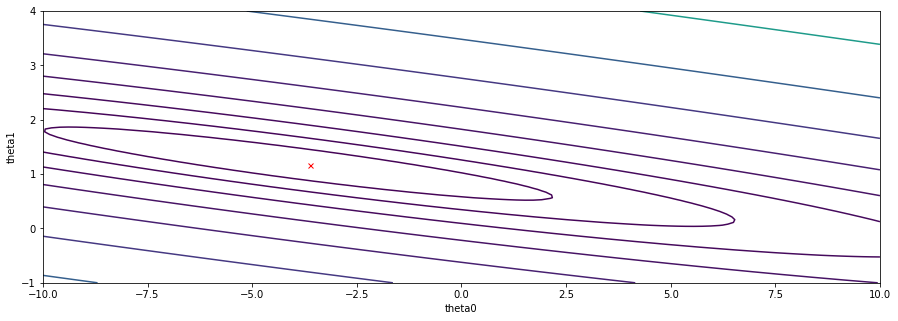

In [92]:
plt.figure(figsize = (15,5))
plt.contour(theta_0_values, theta_1_values, J_vals, np.logspace(-2, 3, 20)) #Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
plt.xlabel('theta0')
plt.ylabel('theta1')
plt.plot(theta[0], theta[1], 'rx', markersize=5, linewidth =2 )  #theta computed above
plt.show()